In [1]:
import seaborn as sns
sns.set_theme(style='darkgrid')
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
paths = ['discrete', 'continuous', 'speed', 'speed_and_direction']
actions = ['discrete heading angle', 'continuous heading angle', 'continuous speed', 'simultaneouse heading angle and speed control' ]
j=0
for path in paths:
    for i in range(10):
        df_tmp = pd.read_csv('./'+path+'/data_{}.csv'.format(i), names=['average conflict number per two flight hours'])
        df_tmp = df_tmp.loc[0:500]
        df_tmp['episode'] = df_tmp.index
        #df_tmp['action'] = path.replace("_", " ")
        df_tmp['action type'] = actions[j]
        df = pd.concat([df, df_tmp])
    #if path == 'discrete' or 'speed_and_direction':
    j+=1
df['average conflict number per two flight hours'] = -df['average conflict number per two flight hours']

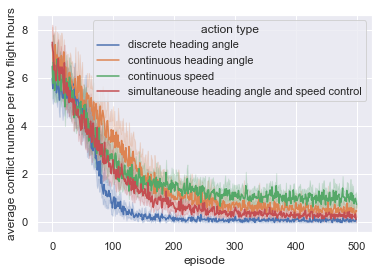

In [3]:
ax = sns.lineplot(x='episode', y='average conflict number per two flight hours', hue='action type', data=df)

In [4]:
fig = ax.get_figure()
fig.savefig('output.png', dpi=200)